In [101]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [102]:
#birdirectional learns forward and backwards and learn best parameter for each and merge them.
data = open('sample.txt').read()

In [103]:
data

"Hailie, I know you miss your Mom, and I know you miss your Dad. When I'm gone, but I'm tryin' to give you the life that I never had. I can see you're sad, even when you smile, even when you laugh. I can see it in your eyes, deep inside you wanna cry. Cause you're scared, I ain't there, Daddy's wit' you in your prayers. No more cryin', wipe them tears, Daddy's here, no more nightmares. We gon' pull together through it, we gon' do it. Lainie, Uncle's crazy, ain't he? Yeah, but he loves you, girl, and you better know it. We're all we got in this world when it spins, when it swirls. When it whirls, when it twirls, two little beautiful girls. Lookin' puzzled, in a daze, I know it's confusin' you. Daddy's always on the move, Mama's always on the news. I try to keep you sheltered from it, but somehow it seems. The harder that I try to do that, the more it backfires on me. All the things growin' up as Daddy that he had to see. Daddy don't want you to see, but you see just as much as he did. W

In [104]:
corpus = data.lower().split('.')

In [105]:
corpus

['hailie, i know you miss your mom, and i know you miss your dad',
 " when i'm gone, but i'm tryin' to give you the life that i never had",
 " i can see you're sad, even when you smile, even when you laugh",
 ' i can see it in your eyes, deep inside you wanna cry',
 " cause you're scared, i ain't there, daddy's wit' you in your prayers",
 " no more cryin', wipe them tears, daddy's here, no more nightmares",
 " we gon' pull together through it, we gon' do it",
 " lainie, uncle's crazy, ain't he? yeah, but he loves you, girl, and you better know it",
 " we're all we got in this world when it spins, when it swirls",
 ' when it whirls, when it twirls, two little beautiful girls',
 " lookin' puzzled, in a daze, i know it's confusin' you",
 " daddy's always on the move, mama's always on the news",
 ' i try to keep you sheltered from it, but somehow it seems',
 ' the harder that i try to do that, the more it backfires on me',
 " all the things growin' up as daddy that he had to see",
 " daddy

In [106]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [107]:
total_len = len(tokenizer.word_index) + 1

In [108]:
total_len

153

In [109]:
input_sequence=[]
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq= token_list[:i+1]
    input_sequence.append(n_gram_seq)

# Training model to predict the likely next word


In [110]:
max_seq_len = max([len(x) for x in input_sequence])

In [111]:
max_seq_len

16

In [112]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequence = np.array(pad_sequences(input_sequence,maxlen=max_seq_len,padding='pre'))

In [113]:
input_sequence

array([[  0,   0,   0, ...,   0,  51,   3],
       [  0,   0,   0, ...,  51,   3,  12],
       [  0,   0,   0, ...,   3,  12,   1],
       ...,
       [  0,   0,   0, ...,  20,  25,  18],
       [  0,   0,   0, ...,  25,  18,  21],
       [  0,   0,   0, ...,  18,  21, 152]], dtype=int32)

In [114]:
xs = input_sequence[:,:-1]
labels = input_sequence[:,-1]

In [115]:
ys = tf.keras.utils.to_categorical(labels,num_classes=total_len)

In [116]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [117]:
ys[6]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
model = Sequential()
model.add(Embedding(total_len,240,input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_len,activation='softmax'))
adam = Adam(lr=0.01)

In [119]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [120]:
history = model.fit(xs,ys,epochs=110,verbose=1)

Epoch 1/110
9/9 [==============================] - 6s 125ms/step - loss: 5.0232 - accuracy: 0.0111
Epoch 2/110
9/9 [==============================] - 1s 126ms/step - loss: 4.9018 - accuracy: 0.0704
Epoch 3/110
9/9 [==============================] - 1s 77ms/step - loss: 4.7510 - accuracy: 0.0481
Epoch 4/110
9/9 [==============================] - 1s 67ms/step - loss: 4.6718 - accuracy: 0.0704
Epoch 5/110
9/9 [==============================] - 1s 70ms/step - loss: 4.6257 - accuracy: 0.0481
Epoch 6/110
9/9 [==============================] - 1s 71ms/step - loss: 4.5750 - accuracy: 0.0704
Epoch 7/110
9/9 [==============================] - 1s 67ms/step - loss: 4.5004 - accuracy: 0.0778
Epoch 8/110
9/9 [==============================] - 1s 69ms/step - loss: 4.3655 - accuracy: 0.0593
Epoch 9/110
9/9 [==============================] - 1s 66ms/step - loss: 4.1760 - accuracy: 0.1037
Epoch 10/110
9/9 [==============================] - 1s 71ms/step - loss: 3.9547 - accuracy: 0.1185
Epoch 11/110
9/9 

In [121]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 240)           36720     
                                                                 
 bidirectional_3 (Bidirecti  (None, 300)               469200    
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 153)               46053     
                                                                 
Total params: 551973 (2.11 MB)
Trainable params: 551973 (2.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

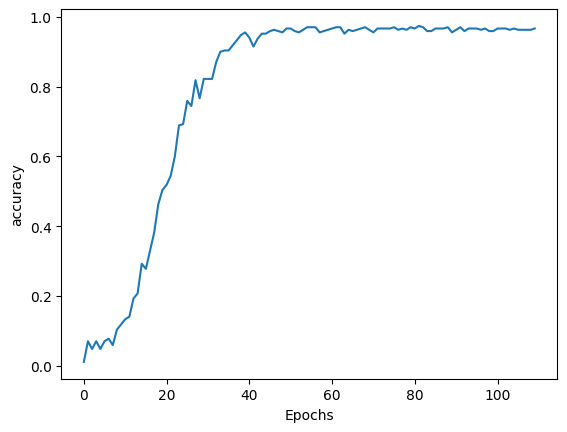

In [123]:
plot_graphs(history,'accuracy')

In [126]:
test_loss, test_accuracy = model.evaluate(xs, ys)

9/9 [==============================] - 1s 21ms/step - loss: 0.0743 - accuracy: 0.9704


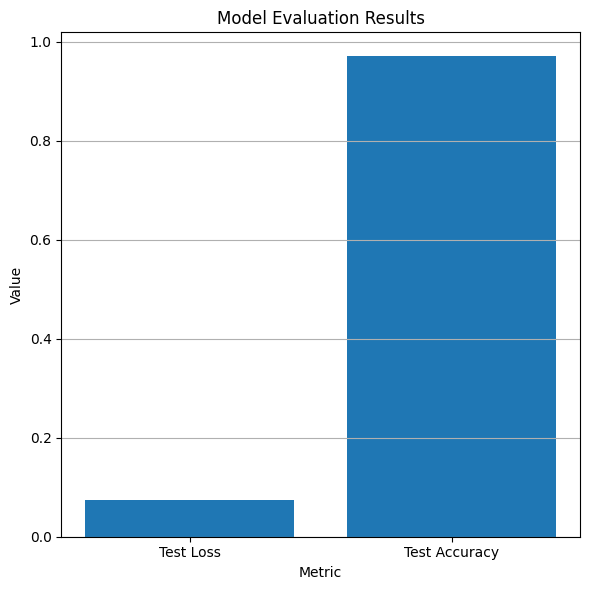

In [148]:
plt.figure(figsize=(6, 6))
plt.bar(x=["Test Loss", "Test Accuracy"], height=[test_loss, test_accuracy])
plt.title("Model Evaluation Results")
plt.ylabel("Value")
plt.xlabel("Metric")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [138]:
test_sentence = "when you laugh"
next_word = 10

In [139]:
for i in range(next_word):
  token_list = tokenizer.texts_to_sequences([test_sentence])[0]
  token_list = pad_sequences([token_list],maxlen=max_seq_len-1,padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output=''
  for word,index in tokenizer.word_index.items():
    if index == predicted:
      output = word
      break
  test_sentence = test_sentence + " " + output

1/1 [==============================] - 0s 25ms/step


In [140]:
test_sentence

"when you laugh gone but i'm tryin' to give you the life that"